In [6]:
#ME2 Computing Excercises 8

#Importing the libraries neccesary:

import numpy as np
import matplotlib.pyplot as pl

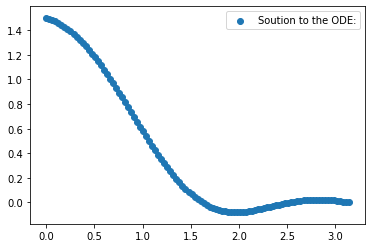

In [7]:
#TASK A

#Defining the Gaussian Elimination, which we will be needeing later:
    
def GaussianElimination(A,b):
    
    #The number of equations in the system is
    n = len(A)

    #Eliminating the matrix so that it becomes upper triangular form
    for j in range(0,n):
        for i in range(j+1, n):
            #Save p so you can use it even after you changed A (p is the pivot)
            p = A[i][j] / A[j][j]
            A[i] = A[i] - p * A[j]
            #Adjusting vector b as well
            b[i] = b[i] - p * b[j]
    
    #Finding the values of x_i for each case 
    
    x = np.zeros(n)
    for i in range(n-1,-1, -1):
        x[i] = b[i] / A[i][i]
        for j in range(i+1,n):
                x[i] = x[i] - x[j] * A[i][j] / A[i][i]
    return x

#Defining a function to print matricies nicelz for testing:

def PrintMatrix (M):
    for row in M:
            print(row)
    print('_'*40)



#Defining the differential equation:

#The differential Equation will have the following form:
#(d^2y) / (dx^2) + f(x) * (dy)/(dx) + g(x) * y = p(x)

def fx(x):
    y_ = 2 * x #Change the f(x) function here
    return y_

def gx(x):
    y_ = 2  #Change the g(x) function here
    return y_

def px(x):
    y_ =  np.cos(3 * x) #Change the p(x) function here
    return y_


#Defining the function that will solve the ODE with the following approximation:

    #(y_{i+1} - 2y_i + y_{i-1}) / h^2 + f(x_i) * (y_{i+1} - y_{i-1}) / h + g(x_i) * y_i = p(x_i)

    #This is rearranged to be:
    #(1 / h^2 - f(x_i) / (2*h)) * y_{i-1} + (g(x_i) - 2/h^2) * y_i + (1/h^2 + f(x_i)/(2 * h)) * y_{i+1} = p(x_i)

    #Which will give a set of linear equations to solve the ODE



def secondOrderODEDirichletBoundaryCondition(a, b, y_a, y_b, N):  #Where a and b define a range, y_a and y_b are the boundary conditions (y(a) = y_a and y(b) = y_b), and N is the number of discretetisations
    
    #Defining the x and y coordinates of the points:
    x = np.linspace(a, b, N+1)
    y = []
    
    #Defining the stepsize:
    h = x[1] - x[0] 
    
    #Defining the Matricies that will define the list of differential equations:
    # A * y = p
    A = np.zeros((N+1,N+1))
    p = np.zeros(N+1)
    y = np.zeros(N+1)
    
    #Adding all of the values into P
    
    
    p[0] = y_a #First adding the initial condition
    
    for i in range(1, N):  #Adding all the values of the discretised p(x function)
        p[i] = px(x[i-1])
        
    p[N] = y_b #Adding the other initail condition
        
    #Adding all of the values into A
    
    A[0][0] = 1
    A[N][N] = 1
    
    for i in range(1,N):
        #Calculating the coefficients
        a_ = 1/h**2 - fx(x[i])/(2*h)
        b_ = gx(x[i]) - 2 / h**2           
        c_ = 1/h**2 + fx(x[i])/(2*h)
            
        #Adding it to the matrix:
        A[i][i-1]  = a_  
        A[i][i] = b_
        A[i][i+1] = c_
        
    
    
    y = GaussianElimination(A,p)
   
    
    return x, y


#Testing the function:
    
x, y = secondOrderODEDirichletBoundaryCondition(0, np.pi, 1.5, 0, 100)


pl.scatter(x,y)
pl.legend(["Soution to the ODE:"])

    
        
    



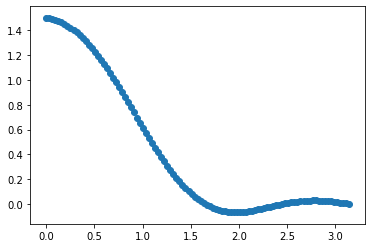

In [8]:
#TASK B

#Make a similar soulution to the ODE, but this time instead of inverting the matrix and calulating the y values explicitly, use an iterative method

def secondOrderODEBoundaryConditionIterative(a, b, y_a, y_b, N, tolerance):
    #Defining the arrays that will hold the nodes
    x = np.linspace(a,b,N+1)
    y = np.zeros(N+1)
    y_ = np.zeros(N+1) #Sencondary to store the first iteration

    #Defining the step size:
    h = x[1] - x[0]
    
    #Adding the information we know from the boundary conditions:
    y_[0]  = y_a
    y_[-1] = y_b
    
    #Adding all the initial guesses to be the mean tófor faster convergence:
    for i in range(1,len(y_)-1):
        y_[i] = (y_a +y_b) / 2
         
        
    #Going through the iretation:
    
    error = 10 * tolerance #Intentianally setting the error too high to enter the for loop
    k = 0 #Setting a counter for the iterations so it can find non-convergent stuff
    
    while error > tolerance and k < 1000000:
        
        #Iterating through to find the next values for y
        y[0]  = y_a
        y[-1] = y_b
        
        for i in range(1,len(y)-1):
            y[i] = (-(y_[i+1] + y_[i-1])/h**2 - fx(x[i])*(y_[i+1]-y_[i-1])/(2*h) + px(x[i]) ) / (gx(x[i])-2/h**2)
    
        
        
        #Calculationg the new relative (not absolute) error
        error = np.max(np.abs(y - y_))
       
        #Saving this iteration for later
        y_ = np.copy(y)
        
        
        #Adding a round of iteration to the counter:
        k += 1
        
        
        
    return x, y


#Testing the function

x,y = secondOrderODEBoundaryConditionIterative(0, np.pi, 1.5, 0, 100, 0.0001)

pl.scatter(x,y)
    
    
        

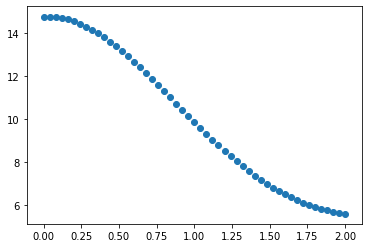

In [9]:
#TASK C

#Making the second order ODE solver from PART A more general, to incorporate any kind of boundary condition:

#The two usual types of boundary conditions are:

    #Dirichlet: where two values of the function are known y_a = B * c_a and y_b = B * c_b     (Just like in TASK A)
    #Neumann: where two values of the derivative are knowmn (dy)/dx_a =  B * c_a and (dy)/dx_b =  B * c_b

#To incorporate both, we shall be implementing this in the mixed (Robin) form:

    #Robin: c_0 * dy/dx_a + c_1 * y_a = BC_a and c_2 * dy/dx_b + c_4 * y_b = BC_b

#______________________________________________________________________________________________________________________


#Defining the differential equation:

#The differential Equation will have the following form:
#(d^2y) / (dx^2) + f(x) * (dy)/(dx) + g(x) * y = p(x)

def fx(x):
    y_ = x #Change the f(x) function here
    return y_

def gx(x):
    y_ = 1  #Change the g(x) function here
    return y_

def px(x):
    y_ =  5 * x #Change the p(x) function here to Q = -5, 0, 5
    return y_

#Defining the function that will solve the ODE with the following approximation:

    #To be able to use information about the derivative we will have to use the Forward Euler for point a and backwards Euler for point b. Otherwise the other points will still be approximated with the central difference scheme
    
def secondOrderODERobinBoundaryCondition(a, b, BC_a, BC_b, N, c): #Where a and b are the ends of the ranges, N is the number of subintervals. BC_a and BC_b are the values defined above to form the Robin boundary conditions with the C list which holds c_1, c_2, c_3 and c_4

    #Defining the x and y coordinates of the points:
    x = np.linspace(a, b, N+1)
    y = []
    
    #Defining the stepsize:
    h = x[1] - x[0] 
    
    #Defining the Matricies that will define the list of differential equations:
    # A * y = p
    A = np.zeros((N+1,N+1))
    p = np.zeros(N+1)
    y = np.zeros(N+1)
    
    #Adding all of the boundary condidions
    
    
    #For the first point we need the forwards Euler scheme
    A[0][0] = c[1] - c[0]/h
    A[0][1] = c[0]/h
    p[0] = BC_a
    
    
    #For the the last point we need the backwards Euler scheme:
    A[N][N-1] = -c[2]/h
    A[N][N] = c[2]/h + c[3]
    p[N] = BC_b
    
    #Adding the middle values to the system of linear equations with the central difference method:
    for i in range(1,N):
        #Calculating the coefficients
        a_ = 1/h**2 - fx(x[i])/(2*h)
        b_ = gx(x[i]) - 2 / h**2           
        c_ = 1/h**2 + fx(x[i])/(2*h)
            
        #Adding it to the matrix:
        A[i][i-1]  = a_  
        A[i][i]    = b_
        A[i][i+1]  = c_
        p[i]       = px(x[i])
        
    
    
    y = GaussianElimination(A,p)
   
    
    return x, y
        
#Testing the function:

    #The function and boundary conditions that we are using:
    #(d^2y)/(dx^2) + x dy/dx + y = Q * x (Where Q = -5, 0, 5)
    #With the following boundary conditions:
    #dy/dx_0 = 0 and dy/dx_2 =-1
    
c = [1, 0, 1, 0] #Setting up the constancts to represent the differential equation above
x,y = secondOrderODERobinBoundaryCondition(0, 2, 0, -1, 50, c) #Solving the differential Equation

pl.scatter(x,y) #Plotting the result

    

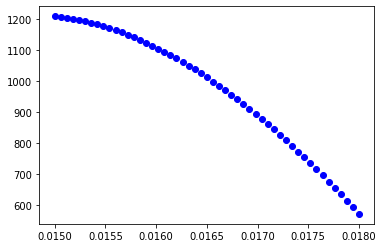

In [10]:
#TASK D

#TASK DESCRIPTION:

#The fuel rod of a nuclear reactor is a cylindrical structure with the fuel contained within
#a metal cladding. The heat is generated by the nuclear reaction in the fuel region and
#conducted, through the thickness of the cladding, to the outer surface of the cladding.
#Outside the cladding cooling occurs with flowing water at 𝑇_w = 473𝐾 through
#convective heat transfer (heat transfer coefficient h = 6 ⋅ 10^4 W/(m^2 * K)
#The temperature distribution within the cladding is determined by the ODE:

    #1/r * d/dr (r * k * DT/dr) = 10^8 (e^-(r/R))/r
    
#In the region of the cladding 𝑅 < 𝑟 < 𝑅 + 𝑤, with boundary conditions:

    # dT/dr_R = - (6.32 * 10^5) / k and DT/dr_{r= R + w} = -h/k * (T_{r = R+w} - T_w)
    
#The thermal conductivity of the metal is 𝑘 = 16.75 W/(mK). The dimensions of the rod are:𝑅 = 15𝑚𝑚 and 𝑤 = 3𝑚𝑚.


#Compute the temperature distribution within the metal cladding, with N = 50!

#______________________________________________________________________________________________________________________


#Setting up the differential Equation so we can then solve it with the function from TASK C

k = 16.75 #Thermal conductivity
R = 0.015 #Inner radious
w = 0.003 #Thickness of cladding
Tw = 473 #Temperature of water
h = 6 * 10000 #Heat transfer coefficient

#The differential Equation will have the following form:
#(d^2y) / (dx^2) + f(x) * (dy)/(dx) + g(x) * y = p(x)

def fx(x):
    y_ = 1 / x
    return y_

def gx(x):
    y_ = 0
    return y_

def px(x):
    y_ =  -10**8*np.exp(-x/R)/(x*k)
    return y_

c = [1, 0, 1, h/k] #Setting up the constancts to represent the differential equation above
BC_a = - (6.32 * 10**5) / k
BC_b = - h / k * (0 - Tw)

#Solving the differential equation:
x,y = secondOrderODERobinBoundaryCondition(R, R + w, BC_a, BC_b, 50, c) #Solving the differential Equation

pl.plot(x,y,'bo') #Plotting the result

In [ ]:
# Importing all the functions from earlier problem sets that we will be needing in the next task:

#LAGRANGIAN INTEROPOLATION (USES BOTH FUNCTIONS BELOW)
    
def Lagrangian(j, xp, xn):
    Lj = 1
    for k in range(len(xn)):
        if k != j:
            Lj = Lj * (xp - xn[k]) / (xn[j] - xn[k])
        else:
            pass
    return Lj

def LagrangianInterpolation(xn, yn, x):
    y = []
    for i in range(len(x)):
        a = 0
        xp = x[i]
        for j in range(len(yn)):
            a += yn[j] * Lagrangian(j,xp, xn)
        y.append(a)
    return y

#TRAPEZIUM RULE FOR NON-EQUIDISTANT NODES

def trapeziumRuleGeneral(x,y):
    
    #Finding the number of nodes (n) and the subinrerval (h) between each neighbouring nodes (Here the nodes might not be equidistant!!)
    n = len(x)
    h = []
    for i in range(n-1):
        h.append(x[i+1] - x[i]) 
        
    integral = 0
    
    for i in range(n-1):
        
        integral += ((y[i+1]+y[i]) * h[i]) / 2
        
    return integral




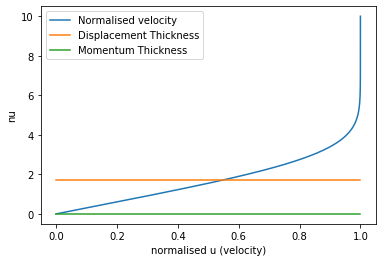

Text(0, 0.5, 'nu')

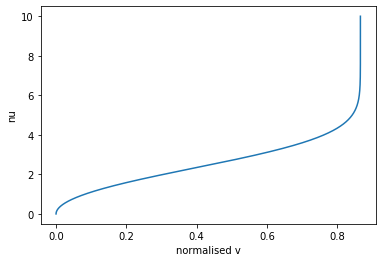

In [38]:
#TASK E

#Solve the Blausius Equation from Fluid mechanics and plot f(nu and u(nu) = df/d(nu))!

    #(d^3f(nu))/(d(nu)^3) + 1/2 * f(nu) * d^2f(nu)/d(nu)^2 = 0
    
#Also find the displacement thickness (integral, 0--> infinity [(1-u(nu)d(nu))]) and the momentum thickness (integral, 0--> infinity [u(nu) * (1-u(nu)d(nu))])

#______________________________________________________________________________________________________________________



# First, re-wrinting the Blausius Equation as three first order ODE-s:

    #(df(nu))/d(nu) = g(nu)
    #(d^2f(nu))/(d(nu)^2) = h(nu)
    #(d^3f(nu))/(d(nu)^3) = (dh(nu))/(d(nu)) = -1/2 * f(nu) * h(nu)
    
#Defining these functions:


def gnu(nu, y):
    y_ = y[1]
    return y_
    
def hnu(nu, y):
    y_ = y[2]
    return y_

def dhdnu(nu, y):
    y_ = -0.5 * y[0] * y[2]
    return y_
    
#Defining the domain (In therory should be 0 --> (infinity), but in reality a finite domain has to be defined)

nu_0 = 0
nu_n = 10

#Defining the initial conditions:

    #f(0) = 0
    #(df(0))/(d(nu)) = g(0) = 0
    #(df(nu_{max}))/(d(nu)) = g(nu_{max}) = 1
    
y0 = np.ndarray(3) #Defining a single multi layer array to hold all of the initial conditions fro the 

y0[0] = 0 #Storing the initail condition for f(nu = 0)
y0[1] = 0 #Storing the initail condition for g(nu = 0)
y0[2] = 1 #First random guess for the initial condition of (d^2(nu))/(d(nu)^2)
gFinal = 1


# Next, defininig a new numerical method funciton to deal with 3 simultanious forwards euler methods:

def frowardsEulerThreeEquations(y0, nu_0, nu_n, h): #Where y0 is the 3D array defined to hold the initail conditions, nu_0 and nu_n define the range and h is the step size
    #Initialising the function
    nu = np.arange(nu_0, nu_n + h, h) #defining the x axis
    
    y = np.ndarray((3,len(nu))) #defining the output array
    y[0,0] = y0[0]
    y[1,0] = y0[1]
    y[2,0] = y0[2]
    
    #Adding the initial conditions:
    
    for i in range(1,len(nu)):
        y[0,i] = y[0, i-1] + gnu(nu[i-1], y[:, i-1]) * h
        
        y[1,i] = y[1, i-1] + hnu(nu[i-1], y[:, i-1]) * h
        y[2,i] = y[2, i-1] + dhdnu(nu[i-1], y[:, i-1]) * h
                                   
    return nu, y



#To find the solution we will need to use the shooting method, where (df^2(0))/(d(nu)^2) is guessed and then corrected for each iteration to give the right boundary conditions

    #Initializing the shooting method:

tolerance = 1.0e-5   #Desired max difference between actual f(nu_{max}) and computed f(nu_{max}) (BUT NOTE: the error that we compare tolerance to is just a relative error not an absolute)
maxIterations = 1000 #Maximum number of interations before exiting the while loop

error = 10000 #Deliberatly setting the error too high to enter the while loop
numberOfIterations = 0 #Setting the counter for thenumber of iterations
g__ = 0 #Creating a new variable to store the last value of g(nu), initially set to g(0) = 0
h__ = 0 #Creating a new variable to store the last value of h(nu), initially set to h(0) = 0
h = (nu_n - nu_0) / 1000 #Finding the step size


    #Going throught the iteration of the shooting method:
    
while error > tolerance and numberOfIterations < maxIterations:

    
    numberOfIterations += 1 #Adding one to the iteration counter with each pass of the loop
    
    
    (nu, y) = frowardsEulerThreeEquations(y0, nu_0, nu_n, h)
                                   
    g_ = np.array([g__,y[1,-1]])
    h_ = np.array([h__,y0[2]])
    
    newGuess = LagrangianInterpolation(g_, h_, np.array([gFinal])) #Finding the new guess for (d^2(nu)) / (d(nu)^2)             
    
    # update old points with current values
    g__ = y[1,-1]
    h__ = y0[2]
    
    # set the new estimated value for h(at 0)
    y0[2] = newGuess[0]

    #Find the relative error in the estimate
    error = abs(y[1,-1]-gFinal)

    



#_______________________________________________________

#TESTING THE FUNCTION



#Redifining the result:
f = y[0, :] #Displacement
u = y[1, :] #Velocity
v = 0.5*(nu*u-f)

#Finally calculating the displacement and momentum thickness:
displacementThickness = trapeziumRuleGeneral(nu,max(u)-u)  #Displacement thickness 0 -> (infinity) of 1-u(nu)
momentumThickness = trapeziumRuleGeneral(nu, u * max(u)-u) # momentum thickness 0-> (infinity) of u(nu)*(1-u(nu))


#Plotting the results:
pl.plot(u, nu)
pl.xlabel('normalised u (velocity)')
pl.ylabel('nu')
pl.plot([0,max(u)],[displacementThickness,displacementThickness])
pl.plot([0,max(u)],[momentumThickness,momentumThickness])
pl.legend(["Normalised velocity", "Displacement Thickness" ,"Momentum Thickness"])
pl.show()



pl.plot(v,nu)
pl.xlabel('normalised v')
pl.ylabel('nu')
